In [1]:
import pandas as pd
import numpy as np

# other
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
from time import time
from pandas.api.types import is_numeric_dtype

np.random.seed(410)

# Preprocessing

Mostly data cleaning and feature engineering.

**Load fifa19 dataframe**:

In [2]:
df_19 = pd.read_csv('../data/fifa19_prices.csv', index_col='Unnamed: 0', parse_dates=['added_date', 'date'])
df_19.drop('quality', axis=1, inplace=True)
df_19 = df_19[df_19.club!='Icons'].reset_index(drop=True)

df_19.head(2)

,player_name,revision,overall,club,league,nationality,position,age,height,weight,intl_rep,added_date,pace,pace_acceleration,pace_sprint_speed,dribbling,drib_agility,drib_balance,drib_reactions,drib_ball_control,drib_dribbling,drib_composure,shooting,shoot_positioning,shoot_finishing,shoot_shot_power,shoot_long_shots,shoot_volleys,shoot_penalties,passing,pass_vision,pass_crossing,pass_free_kick,pass_short,pass_long,pass_curve,defending,def_interceptions,def_heading,def_marking,def_stand_tackle,def_slid_tackle,physicality,phys_jumping,phys_stamina,phys_strength,phys_aggression,pref_foot,att_workrate,def_workrate,weak_foot,skill_moves,resource_id,num_games,avg_goals,avg_assists,date,price
0,Ronaldo,Normal,94,Juventus,Serie A TIM,Portugal,ST,33,187,83,5,2018-09-19,90.0,89,91,90.0,87,70,96,94,88,95,93.0,95,94,95,93,87,85,81.0,82,84,76,81,77,81,35.0,29,89,28,31,23,79.0,95,88,79,63,Right,High,Low,4,5,20801,"20,999,017",0.92,0.37,2018-09-20,1366667
1,Ronaldo,Normal,94,Juventus,Serie A TIM,Portugal,ST,33,187,83,5,2018-09-19,90.0,89,91,90.0,87,70,96,94,88,95,93.0,95,94,95,93,87,85,81.0,82,84,76,81,77,81,35.0,29,89,28,31,23,79.0,95,88,79,63,Right,High,Low,4,5,20801,"20,999,017",0.92,0.37,2018-09-21,1322625


**Load fifa20 dataframe**:

In [3]:
df_20 = pd.read_pickle('../data/fifa20_prices.pkl')
df_20 = df_20[df_20.club!='Icons'].reset_index(drop=True)
df_20 = df_20[df_19.columns]

df_20.head(2)

,player_name,revision,overall,club,league,nationality,position,age,height,weight,intl_rep,added_date,pace,pace_acceleration,pace_sprint_speed,dribbling,drib_agility,drib_balance,drib_reactions,drib_ball_control,drib_dribbling,drib_composure,shooting,shoot_positioning,shoot_finishing,shoot_shot_power,shoot_long_shots,shoot_volleys,shoot_penalties,passing,pass_vision,pass_crossing,pass_free_kick,pass_short,pass_long,pass_curve,defending,def_interceptions,def_heading,def_marking,def_stand_tackle,def_slid_tackle,physicality,phys_jumping,phys_stamina,phys_strength,phys_aggression,pref_foot,att_workrate,def_workrate,weak_foot,skill_moves,resource_id,num_games,avg_goals,avg_assists,date,price
0,Cristiano Ronaldo,Normal,93,Piemonte Calcio,Serie A TIM,Portugal,ST,34 years old,187,83,5,2018-09-19,90,89.0,91.0,89,87.0,71.0,96.0,92.0,89.0,95,93,95.0,94.0,95.0,93.0,87.0,85.0,82,82.0,84.0,76.0,83.0,77.0,81.0,35,29.0,89.0,28.0,32.0,24.0,78,95.0,85.0,78.0,63.0,Right,High,Low,4,5,20801,"128,680",1.17,0.46,2019-09-18,2021655
1,Cristiano Ronaldo,Normal,93,Piemonte Calcio,Serie A TIM,Portugal,ST,34 years old,187,83,5,2018-09-19,90,89.0,91.0,89,87.0,71.0,96.0,92.0,89.0,95,93,95.0,94.0,95.0,93.0,87.0,85.0,82,82.0,84.0,76.0,83.0,77.0,81.0,35,29.0,89.0,28.0,32.0,24.0,78,95.0,85.0,78.0,63.0,Right,High,Low,4,5,20801,"128,680",1.17,0.46,2019-09-19,1937247


**Fix the columns and dtypes**:

In [4]:
df_20['age'] = df_20.age.apply(lambda x: x.split(' ')[0]).astype(int)
df_20 = df_20.dropna(subset=['price']).reset_index(drop=True)

for i in range(df_19.shape[1]):
    col = df_20.columns[i]
    dtype = df_19.dtypes[i]
    
    df_20[col] = df_20[col].astype(dtype)

**Create game column and concatenate**:

In [5]:
df_19['game'] = 'FIFA 19'
df_20['game'] = 'FIFA 20'

df = df_19.append(df_20)
df.head(2)

,player_name,revision,overall,club,league,nationality,position,age,height,weight,intl_rep,added_date,pace,pace_acceleration,pace_sprint_speed,dribbling,drib_agility,drib_balance,drib_reactions,drib_ball_control,drib_dribbling,drib_composure,shooting,shoot_positioning,shoot_finishing,shoot_shot_power,shoot_long_shots,shoot_volleys,shoot_penalties,passing,pass_vision,pass_crossing,pass_free_kick,pass_short,pass_long,pass_curve,defending,def_interceptions,def_heading,def_marking,def_stand_tackle,def_slid_tackle,physicality,phys_jumping,phys_stamina,phys_strength,phys_aggression,pref_foot,att_workrate,def_workrate,weak_foot,skill_moves,resource_id,num_games,avg_goals,avg_assists,date,price,game
0,Ronaldo,Normal,94,Juventus,Serie A TIM,Portugal,ST,33,187,83,5,2018-09-19,90.0,89,91,90.0,87,70,96,94,88,95,93.0,95,94,95,93,87,85,81.0,82,84,76,81,77,81,35.0,29,89,28,31,23,79.0,95,88,79,63,Right,High,Low,4,5,20801,"20,999,017",0.92,0.37,2018-09-20,1366667,FIFA 19
1,Ronaldo,Normal,94,Juventus,Serie A TIM,Portugal,ST,33,187,83,5,2018-09-19,90.0,89,91,90.0,87,70,96,94,88,95,93.0,95,94,95,93,87,85,81.0,82,84,76,81,77,81,35.0,29,89,28,31,23,79.0,95,88,79,63,Right,High,Low,4,5,20801,"20,999,017",0.92,0.37,2018-09-21,1322625,FIFA 19


In [6]:
num_players = df.groupby('game').resource_id.nunique().sum()
print('Number of unique players: {}'.format(num_players))

print('Number of events: {}'.format(df.shape[0]))

print('Latest available date: {}'.format(df.date.max()))

Number of unique players: 19077
Number of events: 1252332
Latest available date: 2019-10-17 00:00:00


# Feature Engineering

We need to construct and/or engineer the following features:
- days: number of days specific card has been available
- weekday: day of the week
- gen_pos: general player position - one of: ['defender', 'midfielder', 'forward']
- club/league/nationality grouping: group clubs and leagues according to popularity to avoid sparsity. 
- promo: binary variable indicating whether there was an active promotion.
- source: how one can obtain the card: ['base', 'packs', 'loan', 'objective', 'sbc'] - intentional overlap between base and packs
- available: binary variable indicating whether the card was obtainable on that day.
- days_release: number of days since game release

**Days**:

In [7]:
df['days'] = (df.date - df.added_date).dt.days

Quick to note that some players have prices for the day before they were officially released, implying there's a mistake. Further investigation reveals that these should be offset to the next day instead. 

**Weekday**:

In [8]:
df['weekday'] = df.date.dt.weekday

~~**General Position**:~~

In [9]:
# for_pos = ['ST', 'CF', 'CAM', 'LW', 'LF', 'LM', 'RW', 'RF', 'RM']
# mid_pos = ['CM', 'CDM']
# def_pos = ['LB', 'LWB', 'CB', 'RB', 'RWB']

# df['gen_pos'] = np.where(df.position.isin(for_pos), 'forward', np.nan)
# df['gen_pos'] = np.where(df.position.isin(mid_pos), 'midfielder', df.gen_pos)
# df['gen_pos'] = np.where(df.position.isin(def_pos), 'defender', df.gen_pos)

**Club/League/Nation**:

Group all leagues outside of top5 - repeat the same with teams.

Nations: Mark the 10 most common nations as 1, others 0

In [10]:
# top 5 leagues
t_leagues = ['Premier League', 'Serie A TIM', 'LaLiga Santander', 'Ligue 1 Conforama', 'Bundesliga']
df['league'] = np.where(df.league.isin(t_leagues), 'top', 'other')

# top clubs
t_clubs = ['Manchester United', 'Manchester City', 'Chelsea', 'Liverpool', 'Arsenal', 'Tottenham Hotspur',
           'Paris Saint-Germain', 'Juventus', 'Napoli', 'Inter', 'FC Barcelona', 'Real Madrid', 'Atlético Madrid',
           'Borussia Dortmund', 'FC Bayern München', 'Piemonte Calcio']
df['club'] = np.where(df.club.isin(t_clubs), 'top', 'other')

# top nations
t_nations = ['Spain', 'France', 'Brazil', 'Germany', 'Argentina', 'England',
             'Italy', 'Portugal', 'Holland', 'Belgium']
df['nationality'] = np.where(df.nationality.isin(t_nations), 'top', 'other')

**Promo**:

In [11]:
promos = [[datetime(2019, 10, 18), datetime(2019, 10, 28)],     # halloween
          [datetime(2019, 5, 10), datetime(2019, 6, 21)],       # TOTS
          [datetime(2019, 4, 5), datetime(2019, 4, 15)],        # icon release
          [datetime(2019, 3, 22), datetime(2019, 3, 30)],       # fut bday
          [datetime(2019, 3, 8), datetime(2019, 3, 16)],        # carniball
          [datetime(2019, 2, 15), datetime(2019, 2, 24)],       # rating refresh
          [datetime(2019, 2, 1), datetime(2019, 2, 8)],         # headliners
          [datetime(2019, 1, 18), datetime(2019, 1, 25)],       # ffs
          [datetime(2019, 1, 7), datetime(2019, 1, 14)],        # TOTY
          [datetime(2018, 12, 14), datetime(2018, 12, 24)],     # futmas
          [datetime(2018, 12, 7), datetime(2018, 12, 14)],      # totgs
          [datetime(2018, 11, 23), datetime(2018, 11, 26)],     # black friday
          [datetime(2018, 11, 9), datetime(2018, 11, 16)],      # rttf
          [datetime(2018, 10, 19), datetime(2018, 10, 26)]]     # halloween

def promo_assignment(ds):
    date = pd.to_datetime(ds)
    promo = 0
    for p in promos:
        if (p[0] <= date) & (p[1] >= date):
            promo = 1
            break
    return promo

df['promo'] = df['date'].apply(promo_assignment)                # apply the promo assignment

**Card Source**:

In [12]:
df.revision.fillna('MLS POTM', inplace=True)

df['source'] = 'packs'

# base cards
base = ['Normal', 'Winter Refresh']
df['source'] = np.where(df.revision.isin(base), 'packs', df.source)

# sbc cards
sbc = ['SBC', 'POTM']
df['source'] = np.where(df.revision.apply(lambda x: any(i.lower() in x.lower() for i in sbc)), 'sbc', df.source)

# loan cards
df['source'] = np.where(df.revision.str.contains('Loan'), 'loan', df.source) 
df = df[df.source != 'loan'] # remove loans

# objective cards
df['source'] = np.where(df.revision.str.contains('Ob'), 'objective', df.source)


# overwrite source for cards that were both objectives and in packs (TOTS Rodri)
resources = df[df.price>0].resource_id.unique()
df['source'] = np.where(df.resource_id.isin(resources), 'packs', df.source)

**Availability**:

- ~~Pack cards: will be labeled as available for a week after being added to the database. This isn't always accurate but an overall approximation.~~
- ~~SBC: Availability will also be set for a week - again, an approximation. ~~
- ~~Objectives: Weekly availability~~
- ~~Winter Upgrades + Base Cards: Available throughout except periods where they have special cards in packs. Winter upgrades replace base cards.~~

In [13]:
df = df[df.source=='packs']

**Days Since Release**:

In [14]:
release_f19 = df[df.game=='FIFA 19'].date.min()
release_f20 = df[df.game=='FIFA 20'].date.min()
df['days_release'] = np.where(df.game=='FIFA 19', (df.date - release_f19).dt.days, (df.date - release_f20).dt.days)
df['days_release'] = df.days_release / 365

**Relative Price**:

In [15]:
df.sort_values(by=['game', 'resource_id', 'date'], ascending=True, inplace=True)
df_ = df.shift(1)
df['relative_price'] = np.where(df.resource_id == df_.resource_id, df.price*100/df_.price, 'first')
df = df[df.relative_price!='first']

**Narrow selection and projection**:

We don't need all the remaining columns, so we narrow down our projection before proceeding.

In [16]:
drop_cols = ['revision', 'age', 'num_games', 'added_date', 'avg_goals', 'avg_assists']
df.drop(drop_cols, axis=1, inplace=True)

For the purpose of our project, we remove players with 0 target and only keep gold players whose rating is 83 or greater. 

In [17]:
df = df[(df.price!=0) & (df.overall>=83)].reset_index(drop=True)
df.head(2)

,player_name,overall,club,league,nationality,position,height,weight,intl_rep,pace,pace_acceleration,pace_sprint_speed,dribbling,drib_agility,drib_balance,drib_reactions,drib_ball_control,drib_dribbling,drib_composure,shooting,shoot_positioning,shoot_finishing,shoot_shot_power,shoot_long_shots,shoot_volleys,shoot_penalties,passing,pass_vision,pass_crossing,pass_free_kick,pass_short,pass_long,pass_curve,defending,def_interceptions,def_heading,def_marking,def_stand_tackle,def_slid_tackle,physicality,phys_jumping,phys_stamina,phys_strength,phys_aggression,pref_foot,att_workrate,def_workrate,weak_foot,skill_moves,resource_id,date,price,game,days,weekday,promo,source,days_release,relative_price
0,Iniesta,87,other,other,top,CM,171,68,4,69.0,70,68,90.0,79,84,88,94,90,89,70.0,84,70,65,71,74,71,87.0,94,77,70,92,86,80,61.0,66,54,67,57,56,57.0,47,55,58,58,Right,High,Med,4,4,41,2018-09-21,7807,FIFA 19,2,4,0,packs,0.002740,111.00526091283947
1,Iniesta,87,other,other,top,CM,171,68,4,69.0,70,68,90.0,79,84,88,94,90,89,70.0,84,70,65,71,74,71,87.0,94,77,70,92,86,80,61.0,66,54,67,57,56,57.0,47,55,58,58,Right,High,Med,4,4,41,2018-09-22,8714,FIFA 19,3,5,0,packs,0.005479,111.61777891635711


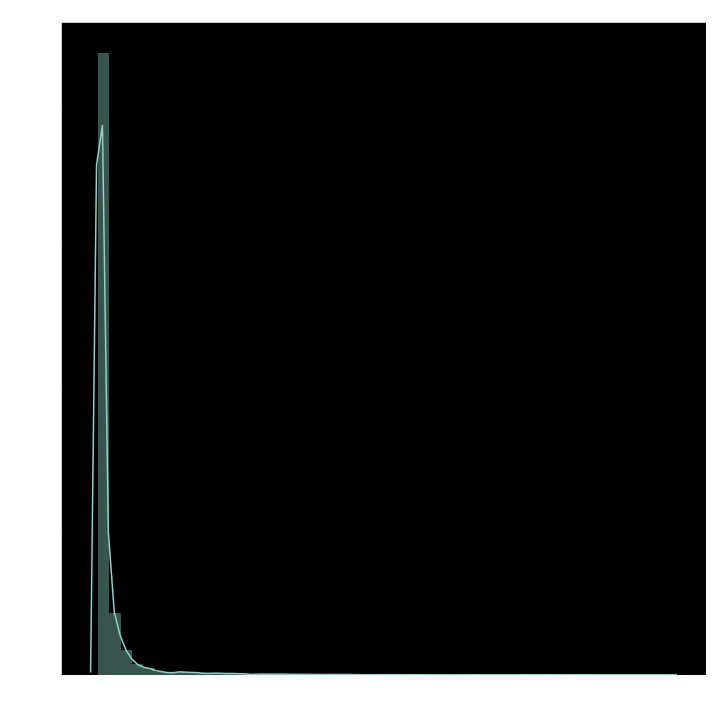

In [18]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.distplot(df.price.values, ax=ax)
ax.set_title('Price Distribution')
plt.tight_layout(); plt.show()

In [19]:
# eliminating "expensive" players -- outliers basically
expensive_resources = df[df.price>1000000].resource_id.unique()
df=df[~df.resource_id.isin(expensive_resources)]

In [20]:
num_players = df.groupby('game').resource_id.nunique().sum()
print('Number of unique players: {}'.format(num_players))

print('Number of events: {}'.format(df.shape[0]))

print('Latest available date: {}'.format(df.date.max()))

Number of unique players: 1314
Number of events: 174132
Latest available date: 2019-10-17 00:00:00


In [21]:
df.to_pickle('../data/sofa_dataset.pkl')